# Customer Segmentation using K-Means Clustering

This project performs customer segmentation on the Mall Customer dataset using K-Means clustering. The aim is to group customers based on similar attributes such as age, income, and spending score to better understand their behaviors and inform marketing strategies.


## Importing Libraries and Loading Data

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
##data_path = './data/Mall_Customers.csv'  # Update this path if needed
data_path = '../data/Mall_Customers.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploring the Data


In [20]:
# Basic information about the dataset
print("Dataset Information:")
print(data.info())

# Checking for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())

# Descriptive statistics of the dataset
print("\nDataset Descriptive Statistics:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values in the Dataset:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.87918

##  Exploratory Data Analysis (EDA)

Before applying K-Means clustering, we perform some exploratory data analysis to understand the distributions of the features (Age, Annual Income, and Spending Score).


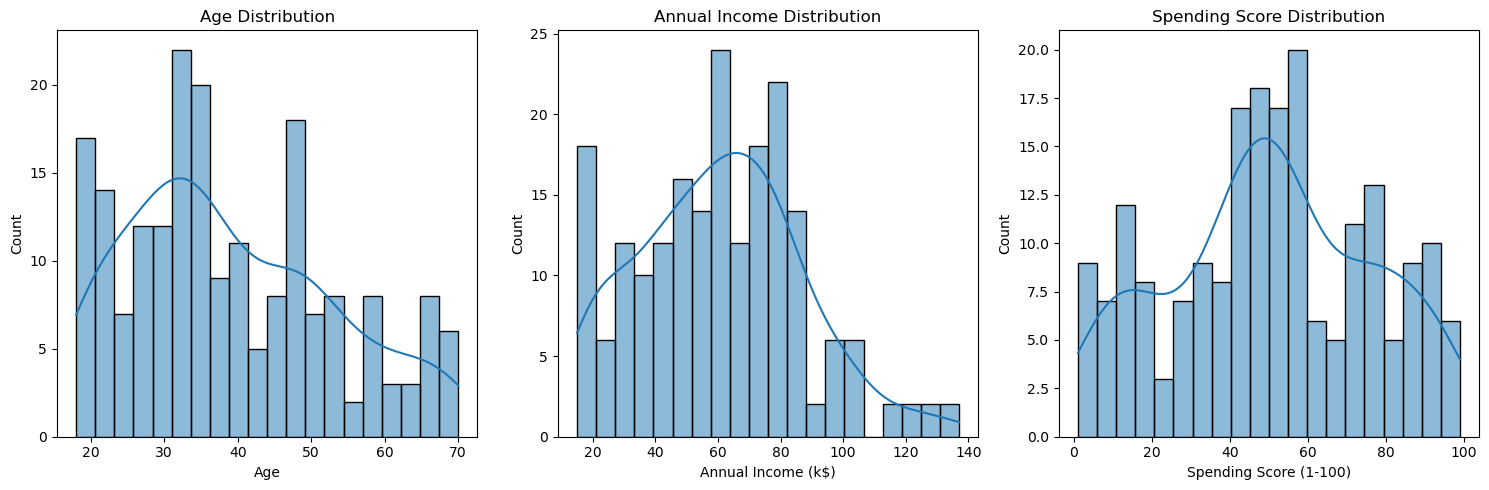

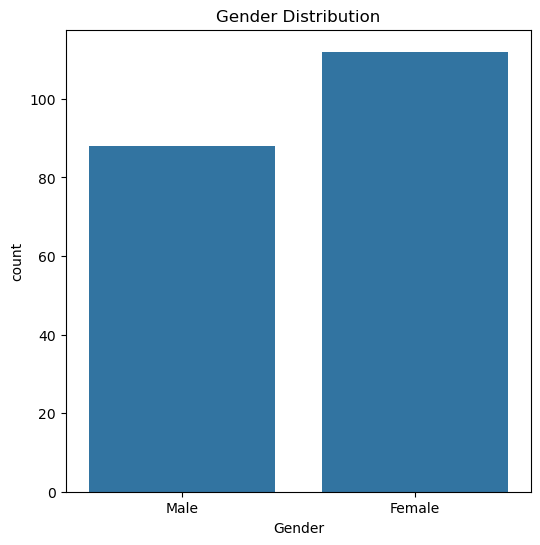

In [21]:
# Plotting histograms for Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Checking the Gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()


### Observations from EDA:
- **Age Distribution**: Most customers fall within the 30-40 age range, with fewer customers older than 60.
- **Annual Income Distribution**: The majority of customers earn between 50k and 90k annually.
- **Spending Score Distribution**: The spending score is evenly distributed across the full range, meaning customers exhibit a wide variety of spending behaviors.


## Data Preprocessing

We standardize the numerical features to ensure they have a similar scale. This is crucial for K-Means clustering, which is sensitive to the magnitudes of features.


In [22]:
# We will only use the numerical columns for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled data
print("\nScaled Data (first 5 rows):")
print(X_scaled[:5])



Scaled Data (first 5 rows):
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


##  Applying K-Means Clustering

We apply K-Means clustering with 5 clusters, based on an analysis of the dataset. The goal is to group customers based on their similarities in age, income, and spending score.


In [23]:
# Applying the K-Means algorithm
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters
kmeans.fit(X_scaled)

# Adding the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Display the first few rows with the cluster labels
print("\nData with Cluster Labels:")
print(data.head())

# Cluster centroids
print("\nCluster Centers (unscaled):")
print(scaler.inverse_transform(kmeans.cluster_centers_))



Data with Cluster Labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  

Cluster Centers (unscaled):
[[46.25       26.75       18.35      ]
 [25.18518519 41.09259259 62.24074074]
 [32.875      86.1        81.525     ]
 [39.87179487 86.1025641  19.35897436]
 [55.63829787 54.38297872 48.85106383]]


C:\Users\Himanshu\anaconda3\envs\customer-segmentation-env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Himanshu\anaconda3\envs\customer-segmentation-env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualizing the Clusters

We visualize the clusters to understand how the customers have been segmented.


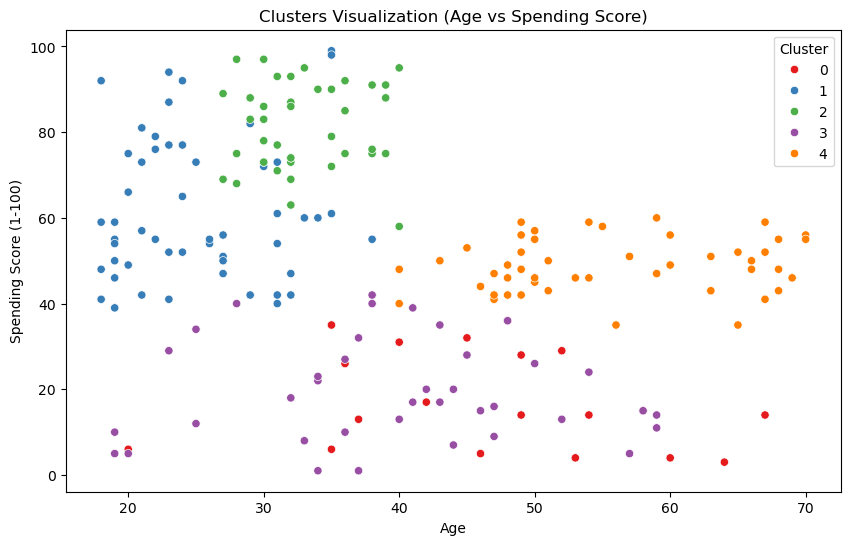

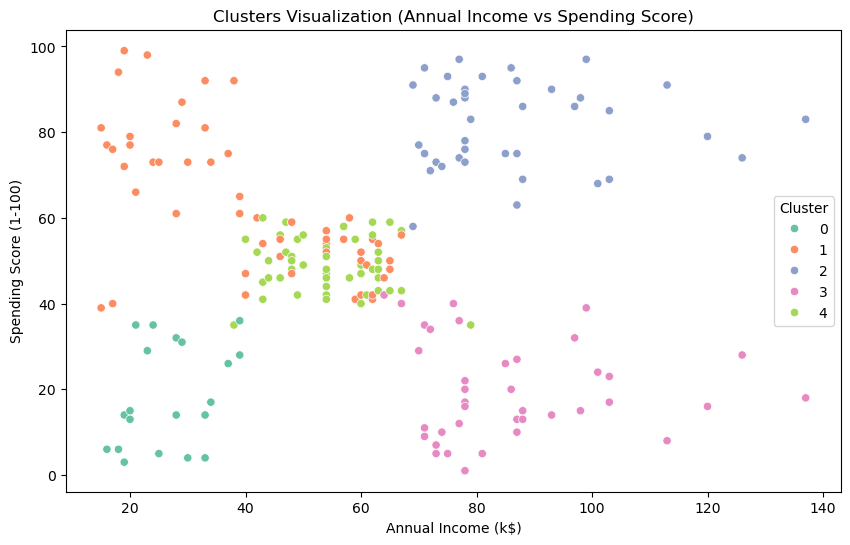

In [24]:
# Visualizing clusters in a 2D space using Age and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters Visualization (Age vs Spending Score)')
plt.show()

# Visualizing clusters in 2D using Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set2')
plt.title('Clusters Visualization (Annual Income vs Spending Score)')
plt.show()


### Observations from Cluster Visualization:
- **Age vs. Spending Score**: 
  - Cluster 0 (Red) consists of older customers with lower spending scores.
  - Cluster 1 (Blue) consists of younger customers with a wide range of spending scores.
  - Cluster 4 (Orange) includes customers of varying ages but consistently higher spending scores.
  
- **Annual Income vs. Spending Score**: 
  - Cluster 2 (Purple) consists of high-income, low-spending customers.
  - Cluster 1 (Orange) includes low-income, high-spending customers, possibly indicating loyal customers who spend a lot regardless of income.
  - Cluster 4 (Green) includes customers with mid-level income and spending scores.


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


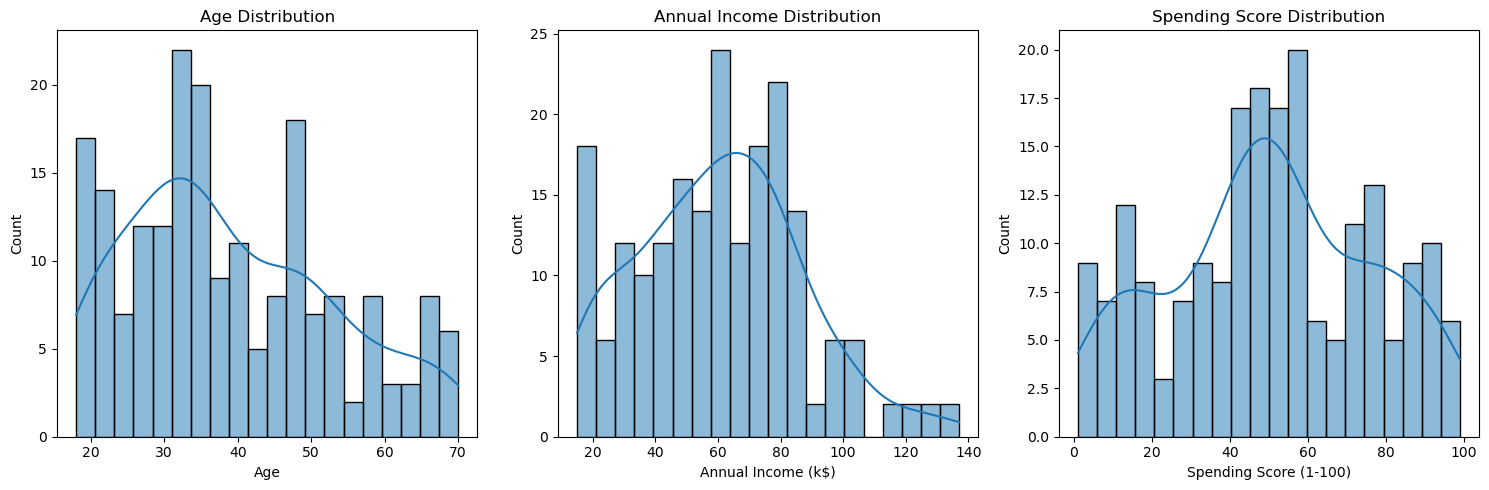


Scaled Data (first 5 rows):
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


C:\Users\Himanshu\anaconda3\envs\customer-segmentation-env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Himanshu\anaconda3\envs\customer-segmentation-env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


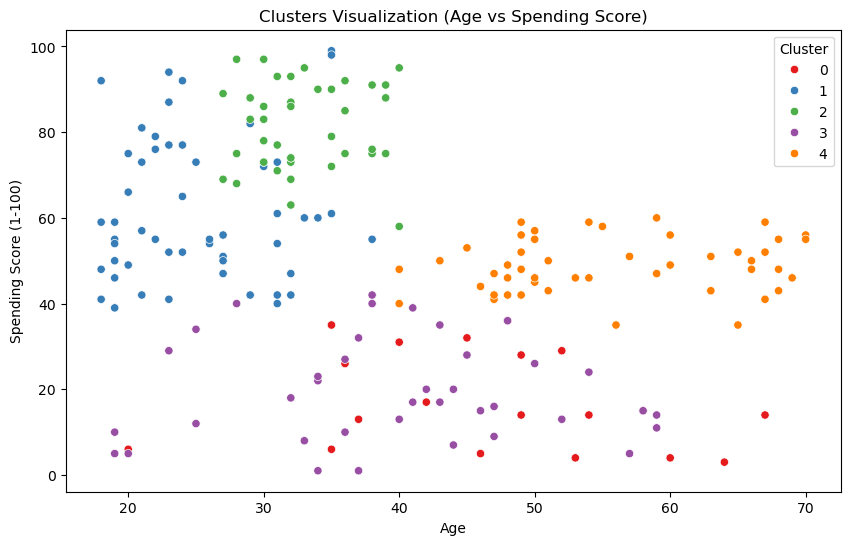

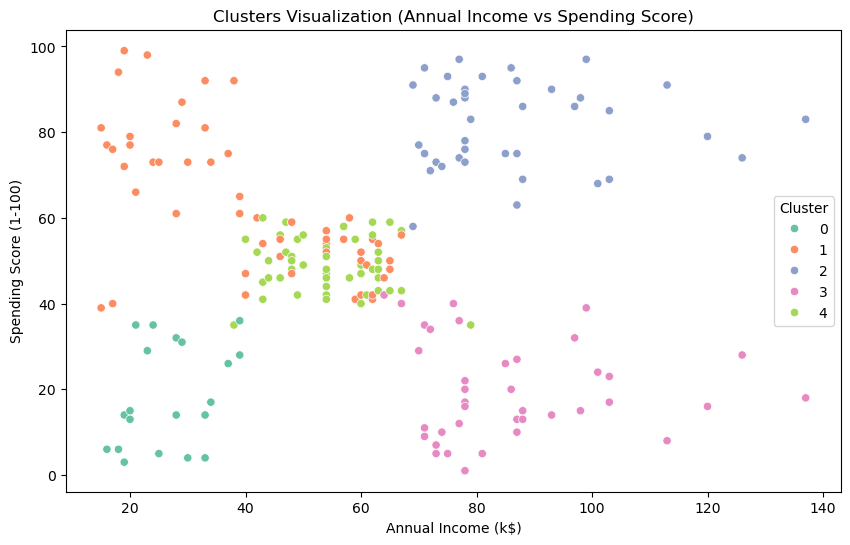


Cluster Centers (unscaled):
[[46.25       26.75       18.35      ]
 [25.18518519 41.09259259 62.24074074]
 [32.875      86.1        81.525     ]
 [39.87179487 86.1025641  19.35897436]
 [55.63829787 54.38297872 48.85106383]]


In [25]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Define paths
data_path = 'C:\\Users\\Himanshu\\customer-segmentation\\data\\Mall_Customers.csv'  # Update this to your path
output_path = 'C:\\Users\\Himanshu\\customer-segmentation\\output'  # Folder for saving outputs

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Load the dataset
data = pd.read_csv(data_path)

# Display first few rows to verify data loading
print(data.head())

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Spending Score Distribution')

plt.tight_layout()

# Save the plot as a PNG image
plt.savefig(os.path.join(output_path, 'eda_histograms.png'))
plt.show()

# Data Preprocessing (Scaling the Features)
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled data
print("\nScaled Data (first 5 rows):")
print(X_scaled[:5])

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Adding the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Save the resulting data with clusters to a CSV file
data.to_csv(os.path.join(output_path, 'mall_customers_with_clusters.csv'), index=False)

# Visualizing clusters in a 2D space using Age and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters Visualization (Age vs Spending Score)')

# Save the cluster visualization plot
plt.savefig(os.path.join(output_path, 'cluster_age_spending_score.png'))
plt.show()

# Visualizing clusters in 2D using Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set2')
plt.title('Clusters Visualization (Annual Income vs Spending Score)')

# Save the cluster visualization plot
plt.savefig(os.path.join(output_path, 'cluster_income_spending_score.png'))
plt.show()

# Cluster centroids (unscaled for interpretation)
cluster_centers_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centers (unscaled):")
print(cluster_centers_unscaled)

# Save cluster centers to a CSV
pd.DataFrame(cluster_centers_unscaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])\
    .to_csv(os.path.join(output_path, 'cluster_centers.csv'), index=False)
